In [1]:
import rdkit # type: ignore
from torch_geometric.datasets import MoleculeNet # type: ignore

# Load the ESOL dataset
data = MoleculeNet(root=".", name="ESOL")
data

/home/shubhankarm/graphneuralnets/.conda/lib/python3.10/site-packages/torch_geometric/data/dataset.py:238: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  if osp.exists(f) and

ESOL(1128)

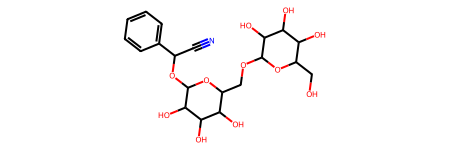

In [18]:
from rdkit import Chem
from rdkit.Chem.Draw import IPythonConsole
molecule = Chem.MolFromSmiles(data[0]['smiles'])
molecule

In [2]:
# Investigating the dataset
print("Dataset type: ", type(data))
print("Dataset features: ", data.num_features)
print("Dataset target: ", data.num_classes)
print("Dataset length: ", data.len)
print("Dataset sample: ", data[0])
print("Sample  nodes: ", data[0].num_nodes)
print("Sample  edges: ", data[0].num_edges)

Dataset type:  <class 'torch_geometric.datasets.molecule_net.MoleculeNet'>
Dataset features:  9
Dataset target:  734
Dataset length:  <bound method InMemoryDataset.len of ESOL(1128)>
Dataset sample:  Data(x=[32, 9], edge_index=[2, 68], edge_attr=[68, 3], smiles='OCC3OC(OCC2OC(OC(C#N)c1ccccc1)C(O)C(O)C2O)C(O)C(O)C3O ', y=[1, 1])
Sample  nodes:  32
Sample  edges:  68


/home/shubhankarm/graphneuralnets/.conda/lib/python3.10/site-packages/torch_geometric/data/dataset.py:169: UserWarning: Found floating-point labels while calling `dataset.num_classes`. Returning the number of unique elements. Please make sure that this is expected before proceeding.
  warnings.warn("Found floating-point labels while calling "


In [3]:
# Investigating the features
# Shape: [num_nodes, num_node_features]

data[0].x

tensor([[8, 0, 2, 5, 1, 0, 4, 0, 0],
        [6, 0, 4, 5, 2, 0, 4, 0, 0],
        [6, 0, 4, 5, 1, 0, 4, 0, 1],
        [8, 0, 2, 5, 0, 0, 4, 0, 1],
        [6, 0, 4, 5, 1, 0, 4, 0, 1],
        [8, 0, 2, 5, 0, 0, 4, 0, 0],
        [6, 0, 4, 5, 2, 0, 4, 0, 0],
        [6, 0, 4, 5, 1, 0, 4, 0, 1],
        [8, 0, 2, 5, 0, 0, 4, 0, 1],
        [6, 0, 4, 5, 1, 0, 4, 0, 1],
        [8, 0, 2, 5, 0, 0, 4, 0, 0],
        [6, 0, 4, 5, 1, 0, 4, 0, 0],
        [6, 0, 2, 5, 0, 0, 2, 0, 0],
        [7, 0, 1, 5, 0, 0, 2, 0, 0],
        [6, 0, 3, 5, 0, 0, 3, 1, 1],
        [6, 0, 3, 5, 1, 0, 3, 1, 1],
        [6, 0, 3, 5, 1, 0, 3, 1, 1],
        [6, 0, 3, 5, 1, 0, 3, 1, 1],
        [6, 0, 3, 5, 1, 0, 3, 1, 1],
        [6, 0, 3, 5, 1, 0, 3, 1, 1],
        [6, 0, 4, 5, 1, 0, 4, 0, 1],
        [8, 0, 2, 5, 1, 0, 4, 0, 0],
        [6, 0, 4, 5, 1, 0, 4, 0, 1],
        [8, 0, 2, 5, 1, 0, 4, 0, 0],
        [6, 0, 4, 5, 1, 0, 4, 0, 1],
        [8, 0, 2, 5, 1, 0, 4, 0, 0],
        [6, 0, 4, 5, 1, 0, 4, 0, 1],
 

In [4]:
# Investigating the edges in sparse COO format
# Shape [2, num_edges]
data[0].edge_index.t()

tensor([[ 0,  1],
        [ 1,  0],
        [ 1,  2],
        [ 2,  1],
        [ 2,  3],
        [ 2, 30],
        [ 3,  2],
        [ 3,  4],
        [ 4,  3],
        [ 4,  5],
        [ 4, 26],
        [ 5,  4],
        [ 5,  6],
        [ 6,  5],
        [ 6,  7],
        [ 7,  6],
        [ 7,  8],
        [ 7, 24],
        [ 8,  7],
        [ 8,  9],
        [ 9,  8],
        [ 9, 10],
        [ 9, 20],
        [10,  9],
        [10, 11],
        [11, 10],
        [11, 12],
        [11, 14],
        [12, 11],
        [12, 13],
        [13, 12],
        [14, 11],
        [14, 15],
        [14, 19],
        [15, 14],
        [15, 16],
        [16, 15],
        [16, 17],
        [17, 16],
        [17, 18],
        [18, 17],
        [18, 19],
        [19, 14],
        [19, 18],
        [20,  9],
        [20, 21],
        [20, 22],
        [21, 20],
        [22, 20],
        [22, 23],
        [22, 24],
        [23, 22],
        [24,  7],
        [24, 22],
        [24, 25],
        [2

In [5]:
data[0].y

tensor([[-0.7700]])

Implementing the Graph Neural Network

In [6]:
import torch
from torch.nn import Linear
import torch.nn.functional as F
from torch_geometric.nn import GCNConv, TopKPooling  # type: ignore
from torch_geometric.nn import global_mean_pool as gap, global_max_pool as gmp # type: ignore
embedding_size = 64


In [7]:
class GCN(torch.nn.Module):
    def __init__(self):
        super(GCN,self).__init__()
        torch.manual_seed(42)
        
        #gcn layers
        
        self.initial_conv = GCNConv(data.num_features, embedding_size)
        
        self.conv1 = GCNConv(embedding_size,embedding_size)
        self.conv2 = GCNConv(embedding_size,embedding_size)
        self.conv3 = GCNConv(embedding_size,embedding_size)
        self.conv4 = GCNConv(embedding_size, embedding_size)
        
        #output layer
        
        self.out = Linear(2*embedding_size,1)
        
    def forward(self, x, edge_index, batch_index):
        #first conv layer
        
        hidden_0 = self.initial_conv(x,edge_index)
        hidden_0= F.tanh(hidden_0)
        
        # other 3 conv layers
        
        hidden_1 = self.conv1(hidden_0, edge_index)
        hidden_1 = F.tanh(hidden_1)
        
        hidden_2 = self.conv2(hidden_1, edge_index)
        hidden_2 = F.tanh(hidden_2)
        
        hidden_3 = self.conv3(hidden_2, edge_index)
        hidden_3 = F.tanh(hidden_3)
        
        hidden_4 = self.conv4(hidden_3, edge_index)
        hidden_4 = F.tanh(hidden_4)
        
        # Global Pooling (stack different aggregations)
        
        hidden_pool = torch.cat([gap(hidden_4, batch_index),gmp(hidden_4,batch_index)], dim=1)
        
        # Apply a final (linear) classifier.
        
        out = self.out(hidden_pool)
        
        return out, hidden_pool
        

In [8]:
model = GCN()
print(model)
print("number of parameters: ", sum(p.numel() for p in model.parameters()))

GCN(
  (initial_conv): GCNConv(9, 64)
  (conv1): GCNConv(64, 64)
  (conv2): GCNConv(64, 64)
  (conv3): GCNConv(64, 64)
  (conv4): GCNConv(64, 64)
  (out): Linear(in_features=128, out_features=1, bias=True)
)
number of parameters:  17409


Training the GNN

In [9]:
from torch_geometric.data import DataLoader # type: ignore
import warnings
warnings.filterwarnings("ignore")
# Defining loss function and optimizer

loss_fn = torch.nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.0001)



In [10]:
device = torch.device("cuda") # if torch.cuda.is_available() else "cpu")
model = model.to(device)

# Wrap data in a data loader

data_size = len(data)
numof_graphs_per_batch  = 64
loader = DataLoader(data[ :int(data_size*0.8)], batch_size = numof_graphs_per_batch, shuffle=True)
test_loader = DataLoader(data[int(data_size*0.2): ],batch_size=numof_graphs_per_batch,shuffle=True)

def train(data):
    for batch in loader:
        batch.to(device)
        
        optimizer.zero_grad()
        
        pred,embedding = model(batch.x.float(), batch.edge_index ,batch.batch)
        loss = loss_fn(pred,batch.y)
        loss.backward()
        
        optimizer.step()
    
    return loss, embedding

In [11]:
print("Starting the training....")
losses= []
for epoch in range(2000):
    loss,h = train(data)
    losses.append(loss)
    if epoch%100==0:
        print(f"Epoch {epoch} | Train Loss {loss}")

Starting the training....
Epoch 0 | Train Loss 9.702274322509766
Epoch 100 | Train Loss 2.2547130584716797
Epoch 200 | Train Loss 2.0474002361297607
Epoch 300 | Train Loss 2.3335750102996826
Epoch 400 | Train Loss 1.8020204305648804
Epoch 500 | Train Loss 2.5342001914978027
Epoch 600 | Train Loss 0.3061600923538208
Epoch 700 | Train Loss 0.8480193614959717
Epoch 800 | Train Loss 1.2189059257507324
Epoch 900 | Train Loss 1.105386734008789
Epoch 1000 | Train Loss 4.097634792327881
Epoch 1100 | Train Loss 0.43639644980430603
Epoch 1200 | Train Loss 0.6314657330513
Epoch 1300 | Train Loss 0.6334051489830017
Epoch 1400 | Train Loss 0.3910408914089203
Epoch 1500 | Train Loss 0.3332185447216034
Epoch 1600 | Train Loss 0.5449062585830688
Epoch 1700 | Train Loss 0.3734932839870453
Epoch 1800 | Train Loss 1.23171067237854
Epoch 1900 | Train Loss 0.4067370295524597


In [38]:
# testing model performance

test_batch = next(iter(test_loader))
loss = 0
with torch.no_grad():
    test_batch.to(device)
    pred, embed = model(test_batch.x.float(), test_batch.edge_index, test_batch.batch) 
    loss += loss_fn(pred, test_batch.y)

mse = loss.item()
rmse = mse ** 0.5

print(f'MSE: {mse:.4f}, RMSE: {rmse:.4f}')

MSE: 0.4948, RMSE: 0.7034


In [50]:
mse_values = []
rmse_values = []
for _ in range(5):
    test_batch = next(iter(test_loader))
    loss = 0
    with torch.no_grad():
        test_batch.to(device)
        pred, embed = model(test_batch.x.float(), test_batch.edge_index, test_batch.batch) 
        loss += loss_fn(pred, test_batch.y)
    mse = loss.item()
    rmse = mse ** 0.5
    mse_values.append(mse)
    rmse_values.append(rmse)

avg_mse = sum(mse_values) / 5
avg_rmse = sum(rmse_values) / 5

print(f'Average MSE: {avg_mse:.4f}, Average RMSE: {avg_rmse:.4f}')

Average MSE: 0.5271, Average RMSE: 0.7175


Visualizing the Training loss

In [ ]:
# Visualize learning (training loss)
import seaborn as sns
losses_float = [float(loss.cpu().detach().numpy()) for loss in losses] 
loss_indices = [i for i,l in enumerate(losses_float)] 
plt = sns.lineplot(loss_indices, losses_float)
plt

In [ ]:
import matplotlib.pyplot as plt
# Visualize learning (training loss)
plt.plot(range(len(losses)), losses, marker='o')
plt.title('Training Loss Over Time')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.grid(True)
plt.show()

Getting a test prediction

In [ ]:
import pandas as pd 

# Analyze the results for one batch
test_batch = next(iter(test_loader))
with torch.no_grad():
    test_batch.to(device)
    pred, embed = model(test_batch.x.float(), test_batch.edge_index, test_batch.batch) 
    df = pd.DataFrame()
    df["y_real"] = test_batch.y.tolist()
    df["y_pred"] = pred.tolist()
df["y_real"] = df["y_real"].apply(lambda row: row[0])
df["y_pred"] = df["y_pred"].apply(lambda row: row[0])
df

In [ ]:
plt = sns.scatterplot(data=df, x="y_real", y="y_pred")
plt.set(xlim=(-7, 2))
plt.set(ylim=(-7, 2))
plt